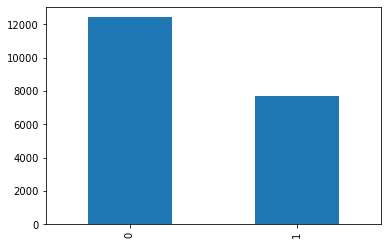

In [1]:
import pandas as pd
import numpy as np

db = pd.read_csv('lc_db_processed.csv').drop(columns = ['Unnamed: 0', 'fish'])

a = pd.Series(np.where(db['conc1_mean'].values > 1, 0, 1))
a.value_counts().plot.bar()

categorical -> one hot

numerical -> [0,1]

pubchem -> one hot

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# carico i dati
db = pd.read_csv('lc_db_processed.csv').drop(columns = ['Unnamed: 0', 'fish'])

# trasformo i pubchem in dataset
pub = pd.DataFrame(pd.DataFrame(db['pubchem2d'].values).apply(lambda x: x.str.replace('', ' ').str.strip().str.split(' '),
                                                        axis = 1)[0].to_list(),
                   columns = ['pub'+ str(i) for i in range(1,882)])

# tolgo dal dataset info inutili
db.drop(columns = ['test_cas', 'smiles', 'pubchem2d'], inplace = True)

# unisco al dataset i pub
db = pd.concat([db,pub], axis = 1)

# one hot encoding di categoriche
categorical = ['obs_duration_mean', 'conc1_type', 'exposure_type', 'control_type', 'media_type',
               'application_freq_unit', 'species', 'class', 'tax_order', 'family', 'genus']

ohe = OneHotEncoder(sparse = False)
ohe.fit(db[categorical])
cat_df = pd.DataFrame(ohe.transform(db[categorical]), columns = ohe.get_feature_names(categorical))
# unisco al dataset (senza variabili categoriche) le categoriche-one-hot
finaldb = pd.concat([db.drop(columns =categorical), cat_df], axis = 1)
finaldb

#trasformo in variabile dicotomica la target 
finaldb['conc1_mean'] = np.where(finaldb['conc1_mean'].values > 1, 0, 1)

# mi preparo
X = finaldb.drop(columns = 'conc1_mean')
y = finaldb['conc1_mean'].values

## K=1
Variabili numeriche come sempre

In [2]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
            'alone_atom_number', 'doubleBond', 'tripleBond', 'ring_number', 'oh_count', 'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print('Accuracy:', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))

0.5938973195965355
0.3993330432580045
0.714327089585016


In [8]:
from scipy.stats import sem
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix


kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
print('Accuracy:', np.mean(accs), 'se:', sem(accs))
print('Sensitivity:', np.mean(sens), 'se:', sem(sens))
print('Specificity:', np.mean(specs), 'se:', sem(specs))

Accuracy: 0.9140995701851014 se: 0.0014541868036512522
Sensitivity: 0.885716811157683 se: 0.0034567513587959926
Specificity: 0.9317999922521742 se: 0.002626326772853722


In [7]:
from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.014432575148331798
0.019167806527597777
0.034493783504758166


Variabili numeriche diverse

In [3]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

0.6108390246009633
0.4224568941053294
0.7274521866685096


In [4]:
from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.014036950243169113
0.017236099541730308
0.032730661874701125


## K = 3

In [2]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.6682233556417448
0.3742240860580821
0.8508364720926946
0.004430696045334543
0.005100562523308714
0.0036637687891276317


## K = 5

In [3]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.6989273202444977
0.42819432162716764
0.8668655140363761
0.004782215420670961
0.020761105032693284
0.00869143678320931


## K = 7

In [7]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.7114473438179783
0.45418123932532534
0.871189262651207
0.005002252732787177
0.008067802423811941
0.008844240742927875


## K = 11

In [8]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 11, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.7219792220134343
0.45734824337123764
0.8863189129468905
0.002702892519725604
0.008840261625626582
0.003765702021480223


## K = 13

In [9]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 13, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.7220289361387009
0.4588996370256761
0.8855312498335348
0.0031508722993767203
0.01035989057534245
0.004232593216254714


In [10]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 31, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.779114698558747
0.5588291776680715
0.9153250765008387
0.01007263275107703
0.02733774680768341
0.002743203820490297


## K=51

In [11]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

numerical = ['atom_number', 'bonds_number','Mol', 'MorganDensity', 'LogP',
             'MeltingPoint', 'WaterSolubility']

kf = KFold(n_splits=5, shuffle=True, random_state = 5645)
accs = []
sens = []
specs = []
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    minmax = MinMaxScaler()
    minmax.fit(X_train[numerical])
    new_train = X_train.copy()
    new_train.loc[:, numerical] = minmax.transform(X_train[numerical])
    
    knn = KNeighborsClassifier(n_neighbors = 51, n_jobs = -1)
    knn.fit(new_train, y_train)
    y_pred = knn.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accs.append(accuracy_score(y_test, y_pred))
    sens.append(recall_score(y_test, y_pred))
    specs.append(tn/(tn+fp))
    
    
print(np.mean(accs))
print(np.mean(sens))
print(np.mean(specs))

from scipy.stats import sem

print(sem(accs))
print(sem(sens))
print(sem(specs))

0.8186606313619856
0.667748028743989
0.9122116401704083
0.0017335847771682115
0.0058100077991638495
0.0017243762638647982
